In [2]:
import numpy as np
from scipy import integrate as integ
from turing_model import TuringModel as tm
from matplotlib import pyplot as plt

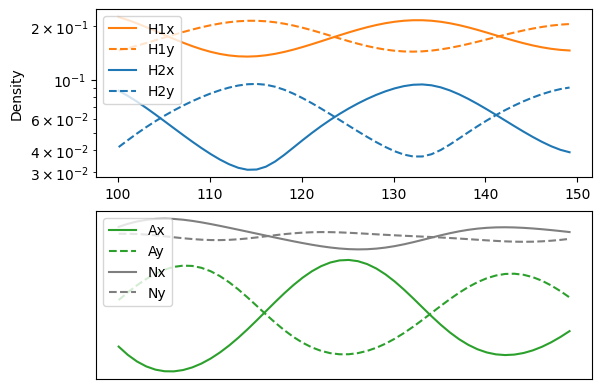

In [49]:
fig, (ax1,ax2)=plt.subplots(2)
#fig, ax1=plt.subplots()
t_end = 1000
number_steps = 1000
t = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.8, 0.4, 0.08, 0.3, 0, 0, 0, 0, 0, 0]
#var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
start = 100#19450
end = 150#19500

var = []
k_1 = 10**0
k_2 = 10**1
d_Hmax1 = 5*10**-2#-3 compare time series
d_Hmax2 = 5*10**-2 #-3
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

# ax1.plot(t[start:end], (var[start:end, 4]/(var[start:end, 4]+var[start:end, 5])), label="H1 flow",color="tab:red")
# ax1.plot(t[start:end], (var[start:end, 6]/(var[start:end, 6]+var[start:end, 7])), label="H2 flow",color="tab:red")
ax1.plot(t[start:end], var[start:end, 4], label="H1x",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1y",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2x",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2y",color="tab:blue", linestyle="--")
ax1.set_yscale("log")
# ax1.set_xlim(10005,10075)
#ax1.set_title("$k_1 < k_2$, $d_{Hmax}$ = " + str(d_Hmax1))
# ax1.get_xaxis().set_visible(False)
# ax1.get_yaxis().set_visible(False)
# ax1.yaxis.set_ticklabels([])
ax1.set_ylabel("Density")
ax1.legend(loc="upper left")
# ax1.set_ylim(10**-6, 10**0)
ax2.plot(t[start:end], var[start:end:, 2], label="Ax",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ay",color="tab:green", linestyle="--")
ax2.plot(t[start:end], var[start:end:, 0], label="Nx",color="tab:grey")
ax2.plot(t[start:end], var[start:end:, 1], label="Ny",color="tab:grey", linestyle="--")
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax2.get_xaxis().set_ticks([])
ax2.get_yaxis().set_ticks([])
ax2.set_xlabel("Time")
ax2.set_ylabel("Density")
# ax2.set_xlim(10005,10075)
ax2.legend(loc="upper left")